In [1]:
#https://github.com/AndrewZhaoLuo/CenterFaceTVMDemo/blob/main/scripts/example_run_centerface_onnx_simple.py

In [2]:
#%pip install onnxruntime 

In [3]:
import numpy as np
import onnxruntime as ort
from PIL import Image as img
from IPython.display import Image


In [4]:
new_width = 640
new_height = new_width

test_image = img.open("/N/10-prj/optimi/tvm/centerface/crowd_of_people.jpeg")
# display(test_image)


In [5]:
width, height = test_image.size
print(width, height)
center_x, center_y = 0.5*np.array([width, height])
center_x, center_y

1920 1080


(960.0, 540.0)

640.0 1280.0
220.0 860.0


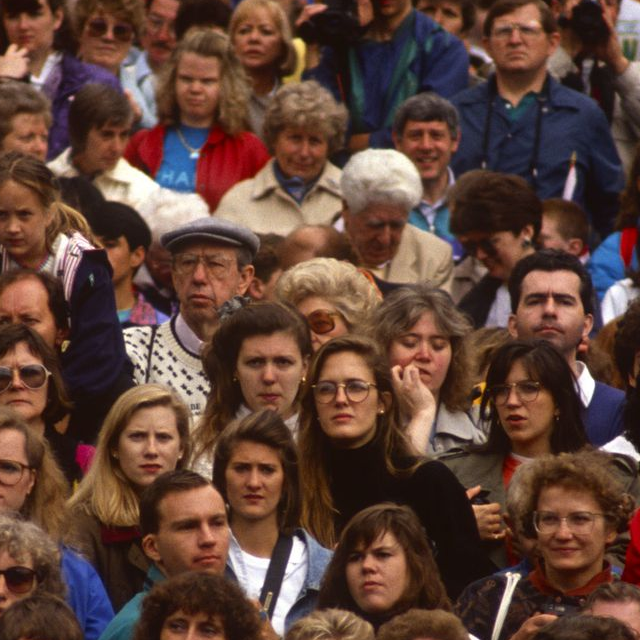

In [6]:
left, right = center_x - new_width/2, center_x + new_width/2 
print(left, right)
top, bottom = center_y - new_height/2, center_y + new_height/2
print(top, bottom)
crop_image = test_image.crop((left, top, right, bottom))
# Image(crop_image)
display(crop_image)

In [7]:
crop_image.size

(640, 640)

In [8]:
#HWC -> CHW -> NCHW
img_hwc = np.array(crop_image)
print(img_hwc.shape)
img_chw=np.transpose(img_hwc, (2,0,1))
print(img_chw.shape)
img_nchw = np.expand_dims(img_chw, 0)
print(img_nchw.shape)
img_nchw = (img_nchw / 255.0).astype("float32")

(640, 640, 3)
(3, 640, 640)
(1, 3, 640, 640)


In [9]:
sessionoption = ort.SessionOptions()
sessionoption.log_severity_level = 3

In [11]:
session = ort.InferenceSession(
    path_or_bytes="/N/10-prj/optimi/tvm/centerface/models/centerface-optimized.onnx"
)



2022-07-26 19:41:52.809751000 [W:onnxruntime:, graph.cc:1220 Graph] Initializer head.lm_conv.bias appears in graph inputs and will not be treated as constant value/weight. This may prevent some of the graph optimizations, like const folding. Move it out of graph inputs if there is no need to override it, by either re-generating the model with latest exporter/converter or with the tool onnxruntime/tools/python/remove_initializer_from_input.py.
2022-07-26 19:41:52.809918400 [W:onnxruntime:, graph.cc:1220 Graph] Initializer head.lm_conv.weight appears in graph inputs and will not be treated as constant value/weight. This may prevent some of the graph optimizations, like const folding. Move it out of graph inputs if there is no need to override it, by either re-generating the model with latest exporter/converter or with the tool onnxruntime/tools/python/remove_initializer_from_input.py.
2022-07-26 19:41:52.809946200 [W:onnxruntime:, graph.cc:1220 Graph] Initializer head.off_conv.bias appea

[array([[[[0.00099501, 0.00140578, 0.0013628 , ..., 0.00113925,
          0.00151542, 0.00139371],
         [0.00126591, 0.00373587, 0.00226286, ..., 0.00239986,
          0.00297499, 0.00233155],
         [0.00189298, 0.00485268, 0.00272954, ..., 0.00250658,
          0.00444782, 0.00275856],
         ...,
         [0.0044983 , 0.00213867, 0.00140736, ..., 0.00093052,
          0.00107858, 0.00374147],
         [0.0034596 , 0.00115797, 0.0007681 , ..., 0.00050879,
          0.00052047, 0.00313142],
         [0.00291184, 0.00298291, 0.0020552 , ..., 0.00170428,
          0.00172088, 0.00360799]]]], dtype=float32), array([[[[2.0481272, 1.6304199, 1.8223778, ..., 1.878119 , 1.844507 ,
          2.1613164],
         [1.667255 , 1.4683051, 1.5101643, ..., 1.5680947, 1.6042188,
          1.6941669],
         [1.6955075, 1.5493388, 1.6160713, ..., 1.6431698, 1.5597943,
          1.6642855],
         ...,
         [1.6559365, 2.456893 , 2.7882824, ..., 3.2685032, 3.282168 ,
          2.514903

In [14]:
%%timeit
result = session.run(
    # output_name = 
    None,
    # input_feed=
    {"input.1":img_nchw}    
)

570 ms ± 75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
result_np=np.array(result)
result_np.shape

/tmp/ipykernel_838/2733526200.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_np=np.array(result)


ValueError: could not broadcast input array from shape (160,160) into shape (1,)

In [18]:
print(np.array(result).flatten())

/tmp/ipykernel_838/4254138220.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(result).flatten())


ValueError: could not broadcast input array from shape (160,160) into shape (1,)

In [33]:
len(result), len(result[0]), len(result[0][0])

(4, 1, 1)

In [38]:
[[len(x) for x in r] for r in result]


(4, 1, 1, 160)

In [41]:
len(result), len(result[0]), len(result[0][0]), len(result[0][0][0])

(4, 1, 1, 160)

In [39]:
# def nested_len(obj, *, target_cls=np.ndarray):
#     return [len(x) if isinstance(x, target_cls) else nested_len(x) for x in obj]
# nested_len(result)

[1, 1, 1, 1]